In [1]:
from plot_classes import *
from matplotlib import transforms

In [2]:
# create boost histogram

v1 = np.random.normal(size=(2, 100_000), scale=0.35)
hist = bh.Histogram(
    bh.axis.Regular(20, -1, 1, metadata="x"),
    bh.axis.Regular(20, -1, 1, metadata="y")
)
hist.fill(*v1)
# pd.DataFrame(hist.to_numpy()[0])
# print(hist.view())
# list(hist.axes.edges[0])
type(hist)

boost_histogram.Histogram

In [6]:
from plot_classes import EmptyPlot


class PythProjection(EmptyPlot):
    
    
    def __init__(self, spacing=0.02, stretch=4, rcp_kw={}, **kwargs):
        
        super().__init__(layout=(2,2), **kwargs)
        self.create_canvas()
        self.make_grid(hspace=spacing, wspace=spacing, height_ratios=[1,stretch], width_ratios=[stretch,1])
        self.main_ax = self.make_subplot(1, 2, 0, 1)
        self.h_ax = self.make_subplot(0, 1, 0, 1)
        self.v_ax = self.make_subplot(1, 2, 1, 2)
        self.set_color() # set default colormap
        self.grid_on = False
        
        
        # set default rcParams for the plot
        self.rcp_dict = {"xaxis.labellocation": 'center', # location of x label w.r.t. x axis
                         "yaxis.labellocation": 'center', # location of y label w.r.t. y axis
                         "axes.labelpad"      : 1, # distance of axis label from axis tick labels
                         "font.size"          : 10, # x, y label AND ticks label font size
                         "axes.titlesize"     : 15, # master title size
                        }
        
        # update dict if user has passed any rcParam values in the constructor
        self.rcp_dict.update({k: v for k, v in rcp_kw.items() if (k in mpl.rcParams)})
        
        # set parameters
        self.config_rcParams(self.rcp_dict)

        
    def fill(self, bh_obj):
        
        if isinstance(bh_obj, list):
            self.data_container = bh_obj
        else:
            self.data_container.append(bh_obj)

        self.active_data = self.data_container[0]
        self.store_data()
        
        
    def store_data(self):
        
        # retrieve x and y data
        self.pd_data = pd.DataFrame(self.active_data.to_numpy()[0])
        self.xsum = self.pd_data.sum(axis=0).to_list()
        self.ysum = self.pd_data.sum(axis=1).to_list()
        self.edges = [x for [x] in [list(self.active_data.axes.edges[0][i]) for i in range(len(self.active_data.axes.edges[0]))]]
        
        
    def projection_plot(self):
        
        hep.hist2dplot(self.active_data, ax=self.main_ax, cbar=False)
        hep.histplot(self.xsum, bins=np.linspace(-1, 1, 21), ax=self.h_ax, color='k', zorder=3)
        hep.histplot(self.ysum, bins=np.linspace(-1, 1, 21), ax=self.v_ax, color='k', zorder=3, orientation='horizontal')
        
        # main plot
        _range = np.arange(self.edges[0], self.edges[-1]+0.5, 0.5)
        label_list = [f"{x:.1f}" for x in _range]
        
        # x axis
        self.main_ax.set_xticks(_range)
        self.main_ax.set_xticklabels(label_list, fontsize=self.rcp_dict["font.size"])
        
        # y axis
        self.main_ax.set_yticks(_range)
        self.main_ax.set_yticklabels(label_list, fontsize=self.rcp_dict["font.size"])

        # modify horizontal (top) plot
        self.set_h_ax()
        if self.grid_on:
            self.set_grid(self.h_ax)

        # adjust ticks
        self.h_ax.ticklabel_format(style='plain')
        for ytick in self.h_ax.yaxis.get_major_ticks():
            ytick.label.set_fontsize(self.rcp_dict["font.size"])
            
        # modify vertical (right) plot
        self.set_v_ax()
        if self.grid_on:
            self.set_grid(self.v_ax)

        # adjust ticks
        self.v_ax.ticklabel_format(style='plain')
        for xtick in self.v_ax.xaxis.get_major_ticks():
            xtick.label.set_fontsize(self.rcp_dict["font.size"])
        
        # set title
        self.fig.suptitle(self.title, fontsize=self.rcp_dict["axes.titlesize"])

        
    def set_h_ax(self, **hax_kw):
        
        self.hax_kw = {"axis"       :'x',
                       "labelbottom": False,
                       "labelsize"  : 5
        }
        self.hax_kw.update(hax_kw)
                
        self.h_ax.set_xlim(-1, 1)
        self.h_ax.tick_params(**self.hax_kw)
        
        
    def set_v_ax(self, **vax_kw):
        
        self.vax_kw = {"axis"     :'y',
                       "labelleft": False,
                       "labelsize": 5
        }
        self.vax_kw.update(vax_kw)
                
        self.v_ax.set_ylim(-1, 1)
        self.v_ax.tick_params(**self.vax_kw)
        
        
    def put_grid(self):
        self.grid_on = True
    
    
    def set_grid(self, ax):

        ax.grid(which='both', zorder=0, alpha=0.5)
        ax.set_axisbelow(True)

        
    def axes_labels(self, fontsize, labelpad=5, **titles_kw):
        # set axis titles according to user input
        
        self.fill_titlesdict(**titles_kw)
        self.set_xtitles(self.main_ax, "xmain", fontsize=fontsize, labelpad=labelpad)
        self.set_xtitles(self.v_ax, "xright", fontsize=fontsize, labelpad=labelpad)
        self.set_ytitles(self.main_ax, "ymain", fontsize=fontsize, labelpad=labelpad)
        self.set_ytitles(self.h_ax, "ytop", fontsize=fontsize, labelpad=labelpad)
        
        
    def display(self, save_name="", dpi=1000):
        
        self.projection_plot()
        
        if save_name:
            self.saveimage(save_name, dpi)

xaxis.labellocation right
yaxis.labellocation top
axes.labelpad 1
font.size 10
axes.titlesize 20


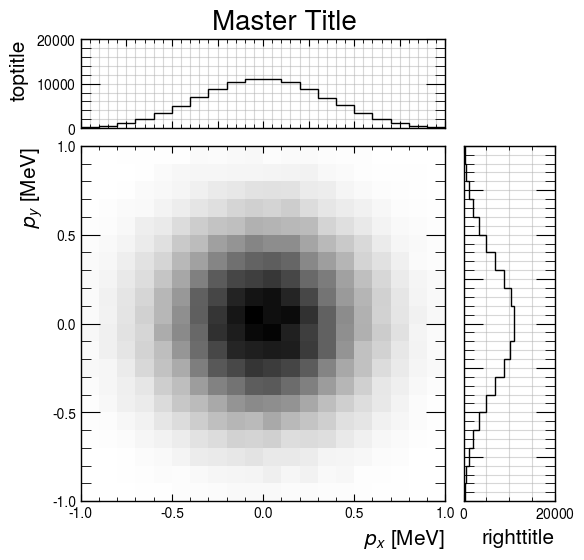

In [8]:
my_dict={"axes.titlesize": 20,
         "xaxis.labellocation": 'right',
         "yaxis.labellocation": 'top',
        }

plot = PythProjection(size=(6,6), title='Master Title', spacing=0.08, rcp_kw=my_dict)
plot.fill(hist)
plot.axes_labels(15, ymain=r'$p_y$'+' [MeV]', xmain=r'$p_x$'+' [MeV]', xright='righttitle', ytop='toptitle')
plot.put_grid()
plot.set_color(colormap='binary')
plot.display()